In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
import string
string.punctuation
import re
import math
import json
from collections import Counter
from num2words import num2words
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [6]:
data= pd.read_json('/media/maruf/DataStorage/Data/scm/Appliances.json', lines=True)

In [7]:
data = data.drop(['reviewerName', 'vote','style', 'image'], axis= 1)

In [8]:
data.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0        5     False  11 27, 2013  A3NHUQ33CFH3VM  1118461304   
1        5     False   11 1, 2013  A3SK6VNBQDNBJE  1118461304   
2        5     False  10 10, 2013  A3SOFHUR27FO3K  1118461304   
3        5     False   10 9, 2013  A1HOG1PYCAE157  1118461304   
4        5     False   09 7, 2013  A26JGAM6GZMM4V  1118461304   

                                          reviewText  \
0  Not one thing in this book seemed an obvious o...   
1  I have enjoyed Dr. Alan Gregerman's weekly blo...   
2  Alan Gregerman believes that innovation comes ...   
3  Alan Gregerman is a smart, funny, entertaining...   
4  As I began to read this book, I was again remi...   

                                             summary  unixReviewTime  
0                  Clear on what leads to innovation      1385510400  
1  Becoming more innovative by opening yourself t...      1383264000  
2              The World from Different Perspectives      1381363200  
3                Strangers are Your New Best Friends      1381276800  
4  How and why it is imperative to engage, learn ...      1378512000

In [9]:
data.overall.value_counts()

5    416288
4     75476
1     59627
3     30652
2     20734
Name: overall, dtype: int64

In [10]:
print("Summary statistics of numerical features : \n", data.describe())

print("\nTotal number of reviews: ",len(data))
print("\nTotal number of unique products: ", len(list(set(data['asin']))))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(data[data['overall']==3]["overall"].count()/len(data)*100))
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(data[data['overall']>3]["overall"].count()/len(data)*100))
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(data[data['overall']<3]["overall"].count()/len(data)*100))

Summary statistics of numerical features : 
              overall  unixReviewTime
count  602777.000000    6.027770e+05
mean        4.274209    1.455049e+09
std         1.301597    5.481787e+07
min         1.000000    9.722592e+08
25%         4.000000    1.423613e+09
50%         5.000000    1.464134e+09
75%         5.000000    1.496016e+09
max         5.000000    1.538611e+09

Total number of reviews:  602777

Total number of unique products:  30252

Percentage of reviews with neutral sentiment : 5.09%

Percentage of reviews with positive sentiment : 81.58%

Percentage of reviews with negative sentiment : 13.33%


Text(0, 0.5, 'Count')

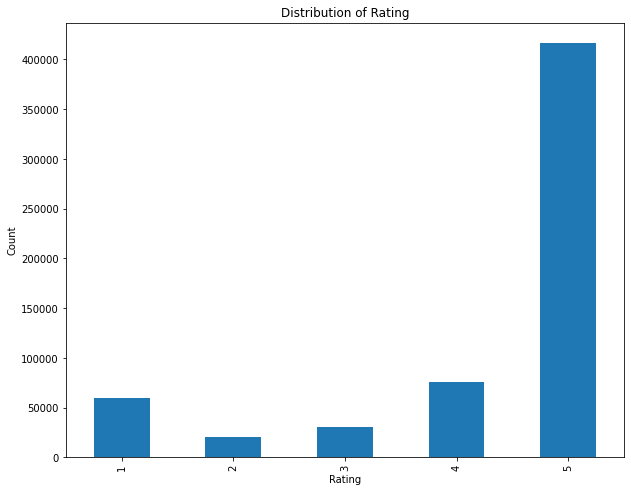

In [11]:
# Plot distribution of rating
plt.figure(figsize=(10,8))
# sns.countplot(df['Rating'])
data['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

In [12]:
from nltk import FreqDist
def freq_words(x, terms = 10):
  all_words = ''.join([str(text) for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 10 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,10))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

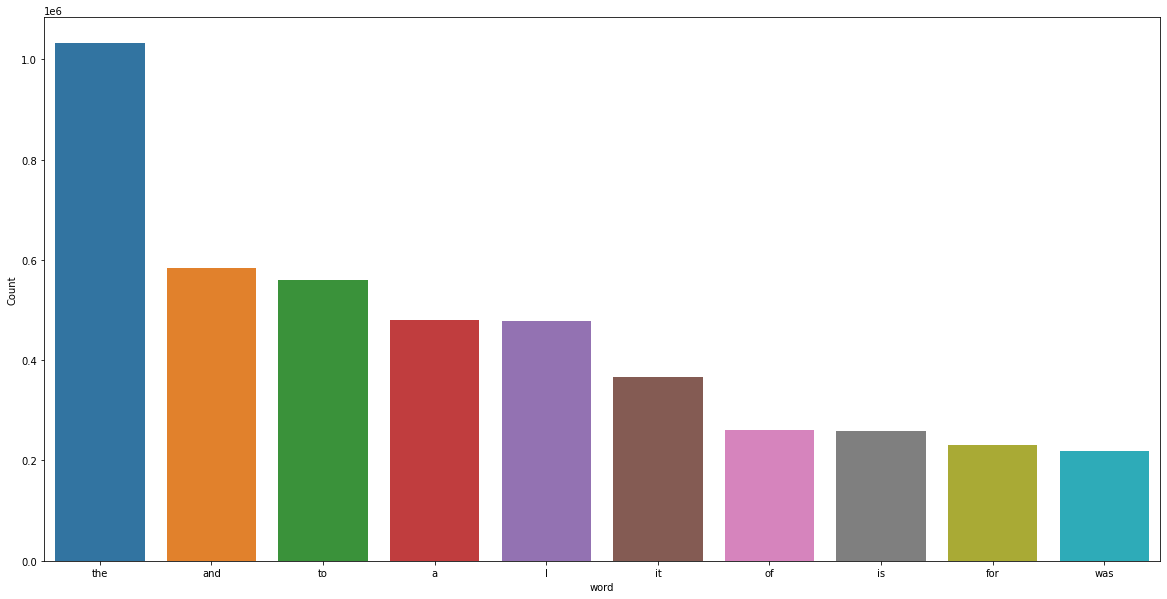

In [13]:
freq_words(data['reviewText'])

In [14]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/maruf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
def expand_constraction(text):
    for key in contractions:
        value = contractions[key]
        text = str(text).replace(key, value)
    return text
data['expand_constract'] = data['reviewText'].apply(lambda x:expand_constraction(x))

In [17]:
data['expand_constract']

0         Not one thing in this book seemed an obvious o...
1         I have enjoyed Dr. Alan Gregerman's weekly blo...
2         Alan Gregerman believes that innovation comes ...
3         Alan Gregerman is a smart, funny, entertaining...
4         As I began to read this book, I was again remi...
                                ...                        
602772              perfect replacement for our broken one.
602773                Quick delivery, did not fit my stove.
602774                           Perfect match for my oven!
602775    Doesn't work with Bosch SHX33A06UC/14 dishwash...
602776    The switch works with my dishwasher after I mo...
Name: expand_constract, Length: 602777, dtype: object